In [1]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017")
db = client.test

import jieba
jieba.set_dictionary('dict.txt.big')

In [2]:
import pandas as pd

df = pd.DataFrame(list(db.lyrics.find({})))

In [ ]:
df[df.lyricist == u'林夕']

In [4]:
df.describe()

,_id,artist,composer,lyricist,lyrics,title
count,28918,28918,25247,25231,28918,28918
unique,28918,200,4892,3273,22293,16592
top,5777e808340940e2084b83f9,鄧麗君,雷頌德,林夕,,Opening
freq,1,1121,647,2038,577,28


In [3]:
dcf = pd.DataFrame({'count': df.groupby('lyricist').size()})
dcf.sort_values(by='count', ascending=False).head(10)

,count
lyricist,
林夕,2038
黃偉文,864
林振強,677
陳少琪,508
鄭國江,504
周禮茂,449
潘源良,372
向雪懷,348
小美,334


In [20]:
# immediately drawing when it sees plot()
%matplotlib inline 

In [22]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
plt.rcParams["font.family"]=['LiHei Pro'] # Or CHINESE will be corrupted!!!

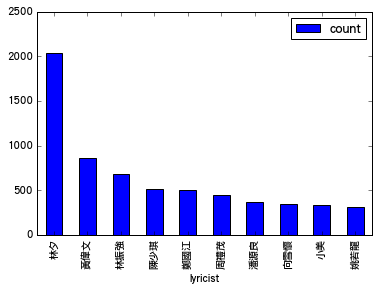

In [23]:
ax = dcf.sort_values(by='count', ascending=False).head(10).plot.bar()
# plt.show()

In [ ]:
# Jieba
seg_list = jieba.cut("晚一點我們去吃大餐好嗎？")
print(", ".join(seg_list))

In [16]:
from wordcloud import WordCloud

In [52]:
def filter_rule_1(input):
    return True if len(input.strip()) > 1 else False

def filter_rule_2(input):
    return False if input.encode('utf-8').isdigit() or input.encode('utf-8').isalpha() else True

def draw_word_cloud(artist):
    cursor = db.lyrics.find({'artist': artist})

    if cursor.count() is 0:
        return

    check_duplicated_set = []
    whole_lyrics = ""
    for document in cursor:
        signature = [document['title'], document['composer'], document['lyricist']]
        if signature in check_duplicated_set:
            continue
        else:
            check_duplicated_set.append(signature)
            whole_lyrics += document['lyrics']
   
    token_list = [token for token in jieba.cut(whole_lyrics)]

    token_list = filter(filter_rule_1, token_list)
    token_list = filter(filter_rule_2, token_list)
    
    unique_token = float(len(set(token_list)))
    all_token = float(len((token_list)))
    print("richness: %f" % (unique_token / all_token))
    
    from collections import Counter
    counter = Counter(token_list)

    for t in counter.most_common(20):
        print("%s: %s" % (t[0], t[1]))
    
    wordcloud = WordCloud(
        font_path="/Library/Fonts/儷黑 Pro.ttf", background_color="black"
    ).fit_words(counter.most_common(100))

    plt.imshow(wordcloud)
    plt.axis("off")
#     plt.show()

richness: 0.254214
一生: 141
沒有: 140
一個: 129
知道: 120
一切: 113
自己: 107
一天: 105
心中: 101
為何: 94
不要: 91
世界: 90
什麼: 88
可以: 88
永遠: 87
我們: 86
一起: 86
不想: 84
我心: 82
不會: 81
怎麼: 79


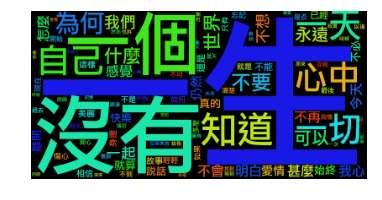

In [53]:
draw_word_cloud('張學友')